<h1>Introduction to Gradient Boosting</h1>

In [1]:
import github_command as gt

In [50]:
gt.push(file_to_transfer="BONUS_Gradient_Boosting.ipynb",
       message="Resized imgs same size", 
       repos="TDs_ESILV.git")

In [2]:
%matplotlib inline

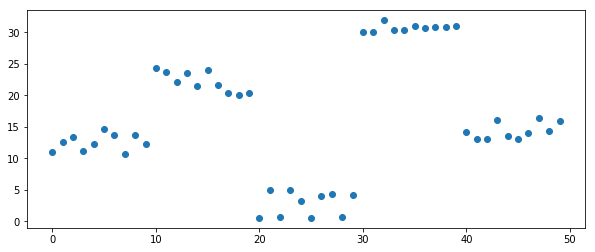

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.arange(0,50)
x = pd.DataFrame({'x':x})

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

plt.figure(figsize=(10,4))
plt.scatter(x,y)
plt.show()

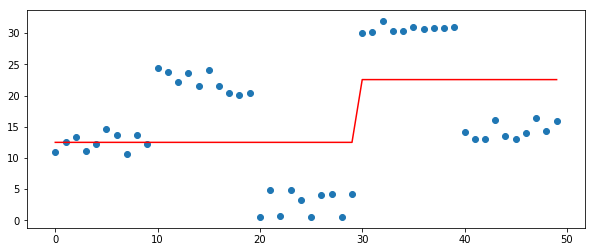

In [47]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=1)
model = clf.fit(x,y)
pred = model.predict(x)

plt.figure(figsize=(10,4))
plt.plot(x, pred, c='red')
plt.scatter(x,y)
plt.show()

In [5]:
clf.get_params()

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [11]:
!pip install pydotplus

<p>How to overcome the issue of graphViz executable not found <a href="https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4">here</a><p>

In [48]:
def create_tree_graph(clf_or_rlf):
    from sklearn.externals.six import StringIO  
    from IPython.display import Image
    import pydotplus
    
    dot_data = StringIO()
    tree.export_graphviz(clf_or_rlf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names=x.columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    
    return graph.create_png()

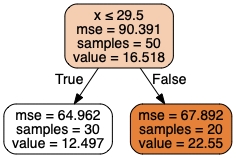

In [49]:
Image(create_tree_graph(clf), width=300)

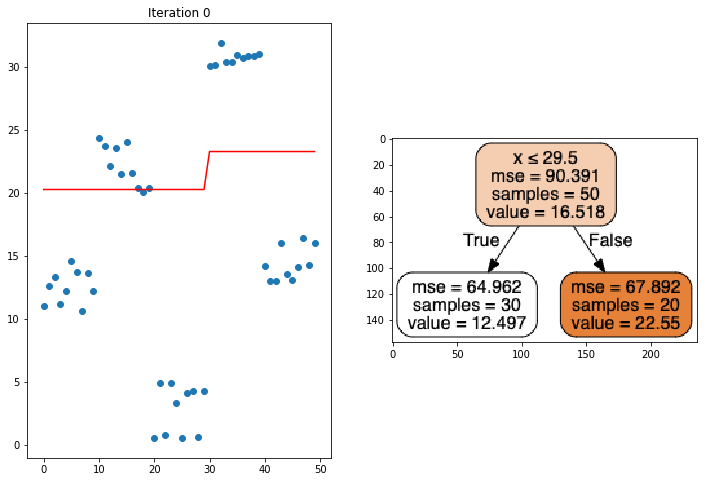

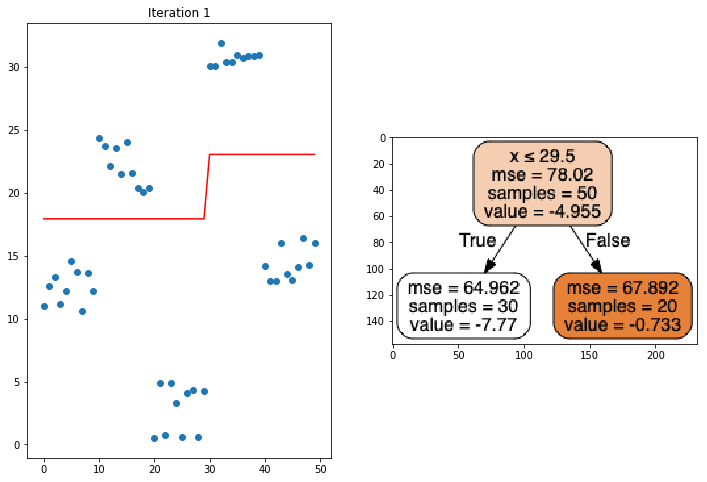

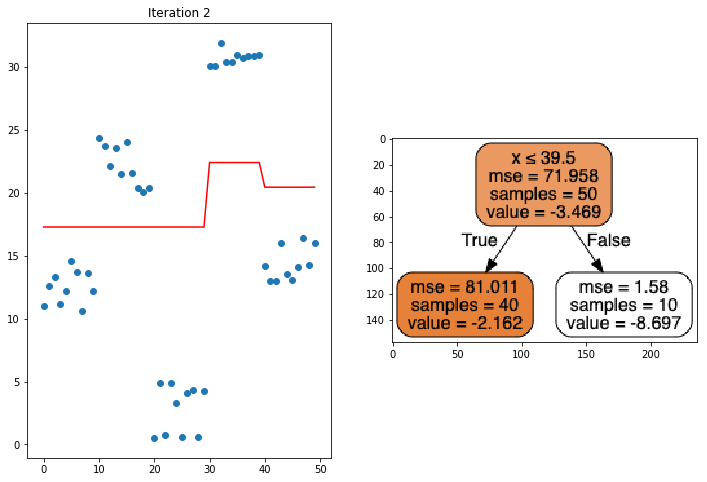

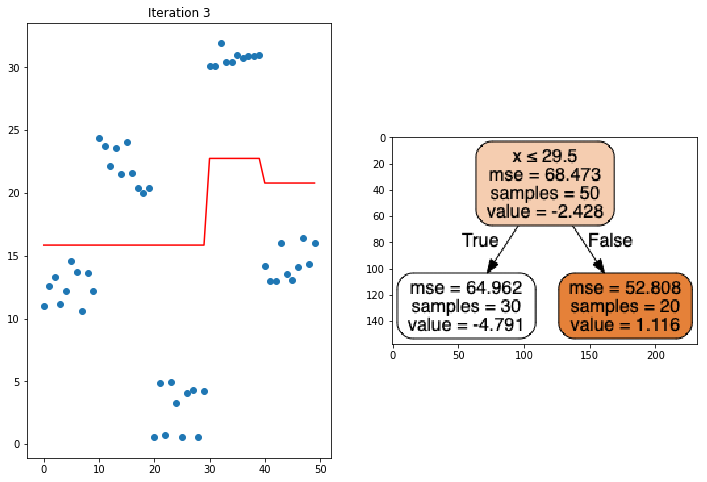

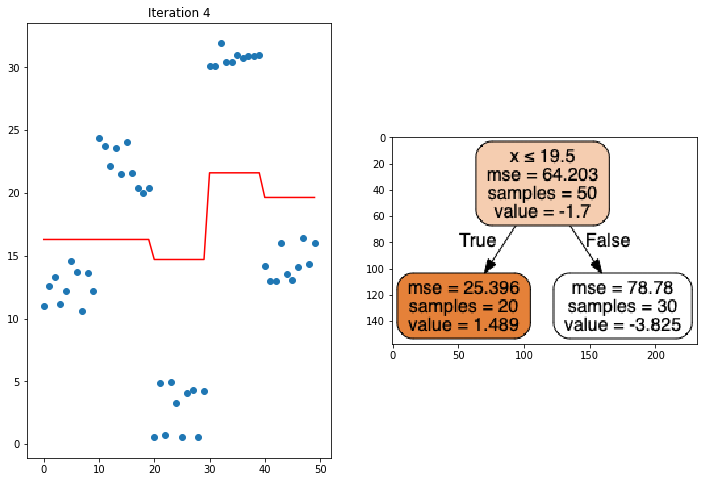

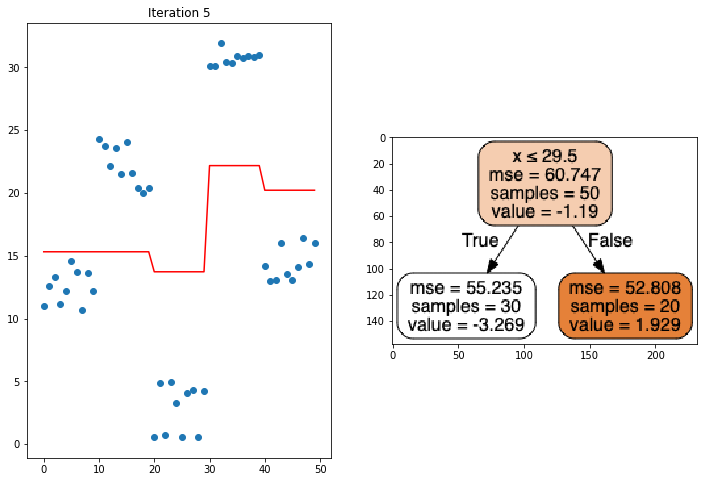

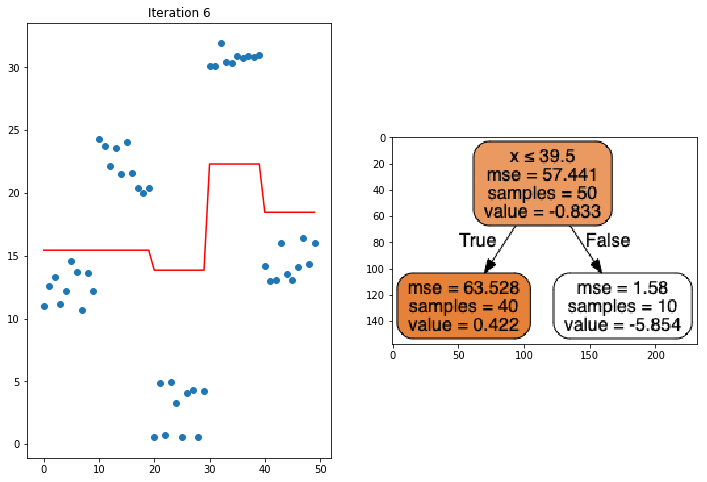

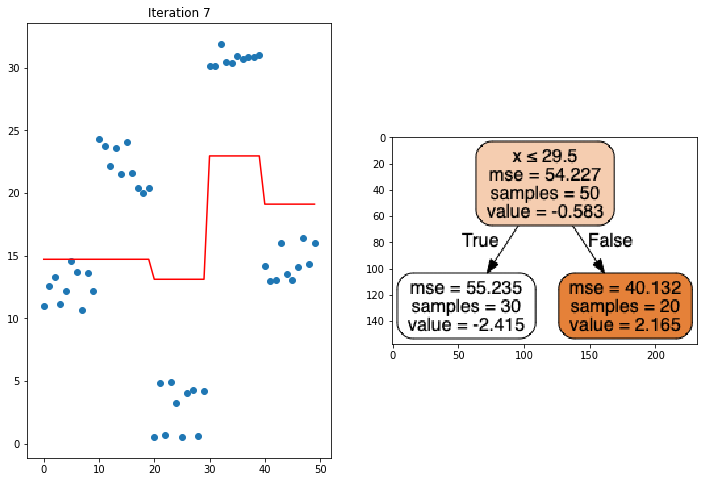

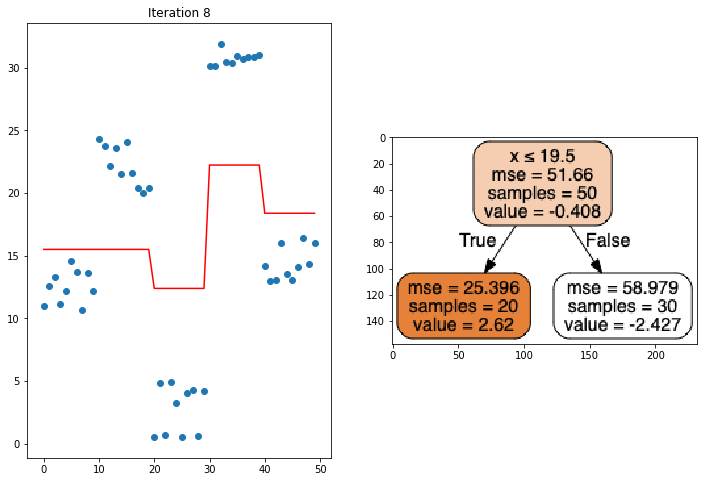

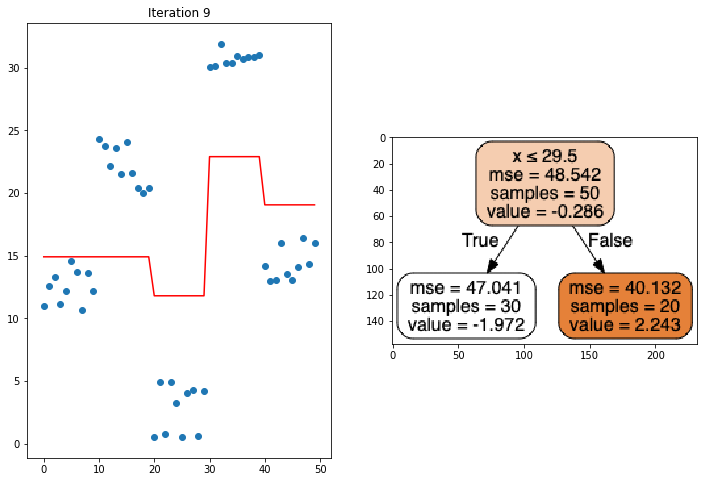

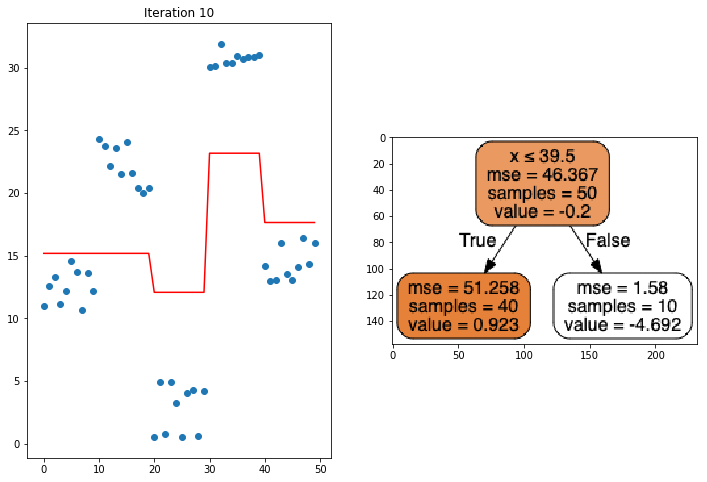

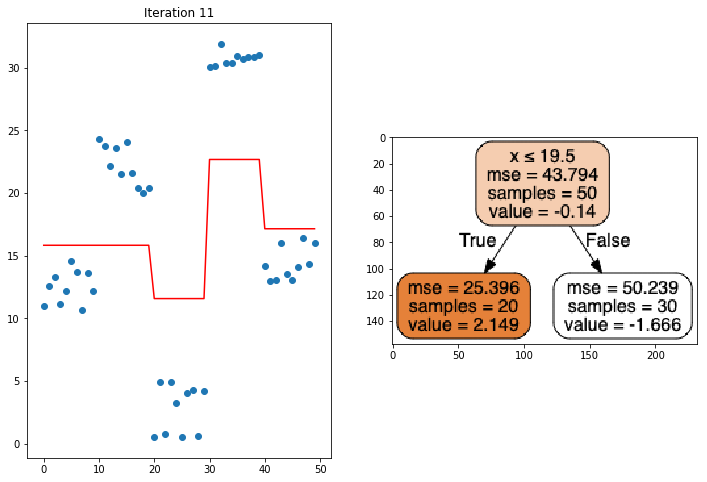

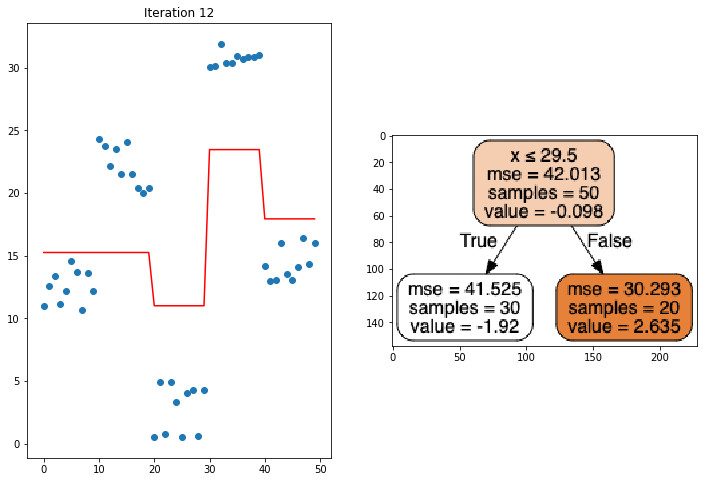

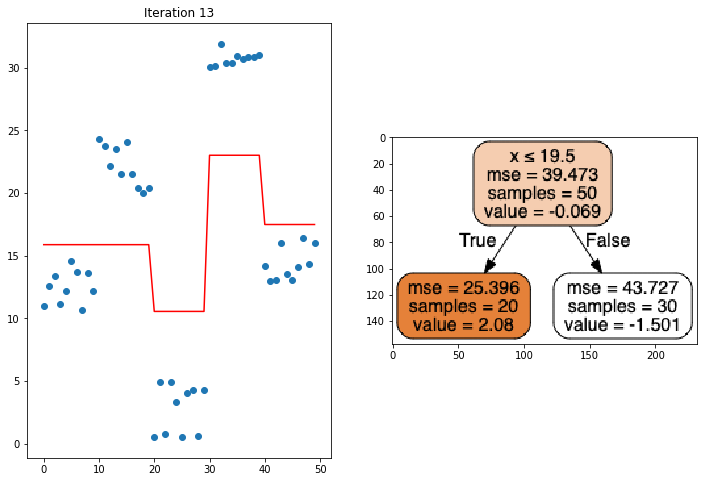

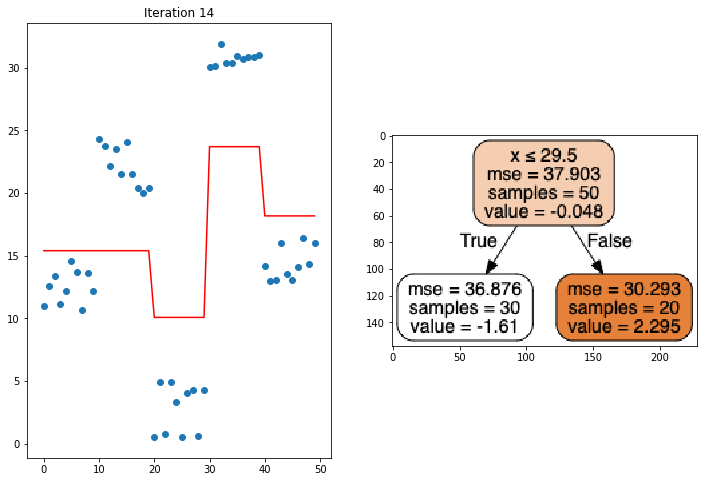

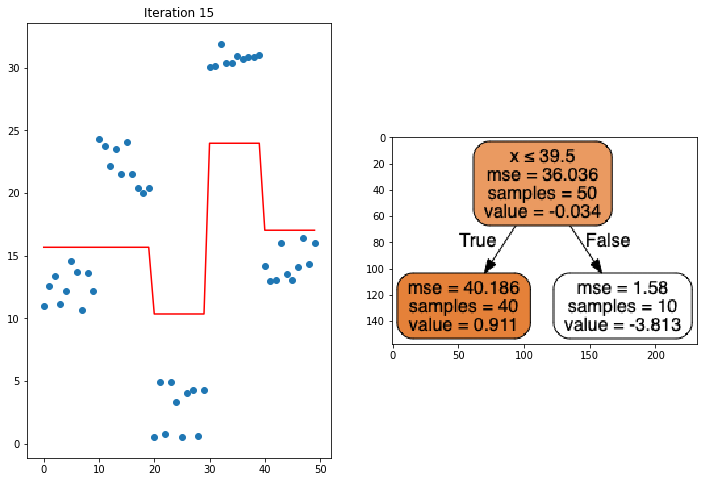

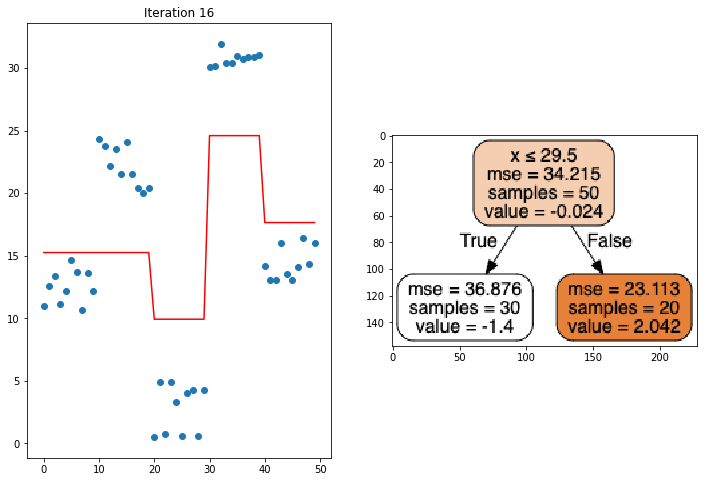

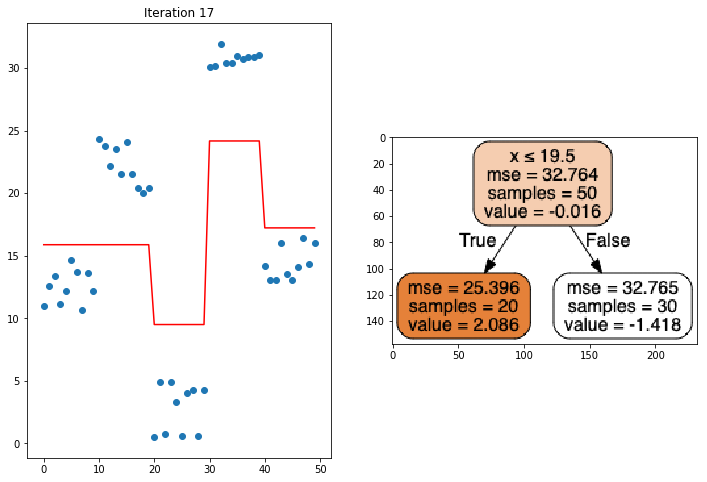

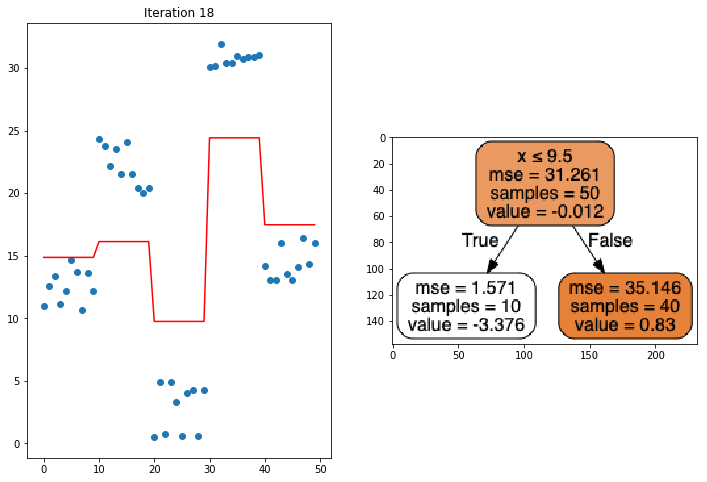

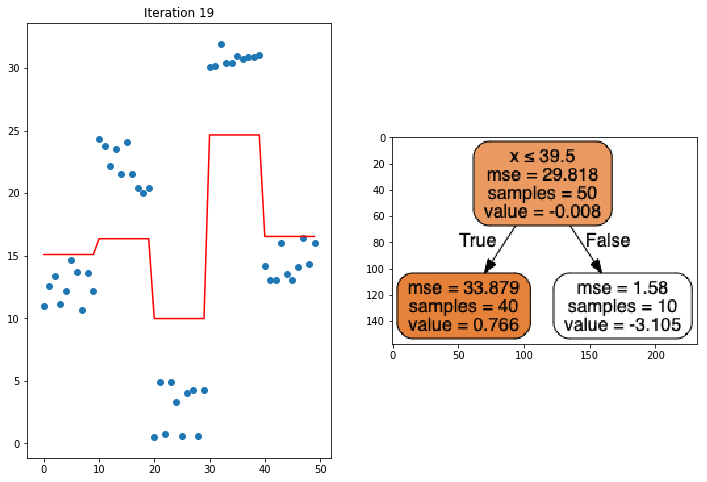

In [70]:
import imageio

xi = x.copy()
yi = y.copy()

# Initialize error to 0
ei = 0
n = len(yi)

# Initialize predictions with average
predf = np.ones(n) * np.mean(yi)

lr = 0.3

# Iterate according to the number of iterations chosen
for i in range(20):

    # Step 2.a)
    # Fit the decision tree / stump (max_depth = 1) on xi, yi

    clf = tree.DecisionTreeRegressor(max_depth=1)
    model = clf.fit(xi, yi)

    # Use the fitted model to predict yi

    predi = model.predict(xi)

    # Step 2.c)
    # Compute the new prediction (learning rate !)
    # Compute the new residuals, 
    # Set the new yi equal to the residuals

    predf = predf + lr * predi
    ei = y.reshape(-1,) - predf
    yi = ei

    # Every iteration, plot the prediction vs the actual data
    fig, axes = plt.subplots(figsize=(12,8), nrows=1, ncols=2)
    plt.subplot(1,2,1)
    plt.plot(x, predf, c='r')
    plt.scatter(x, y)
    plt.title("Iteration " + str(i))
    
    plt.subplot(1,2,2)
    plt.imshow(imageio.imread(create_tree_graph(clf)))
    plt.show()